In [1]:
import numpy as np
import os
from dipy.align import imaffine, imwarp, metrics
from scipy.io import loadmat
import pickle
from dipy.align.transforms import regtransforms
import matplotlib.pyplot as plt

In [2]:
mert = metrics.SSDMetric(3)
aff = imaffine.AffineRegistration()
syn = imwarp.SymmetricDiffeomorphicRegistration(metric=mert)

In [3]:
imgs = []
path = '../../dataset/LPBA40/resample/'
for i in range(1,41):
    m = loadmat(path+'S{:0>2d}.mat'.format(i))
    imgs.append(m['d'])

# generate image pairs

In [12]:
img_pairs = set()
while len(img_pairs)<25:
    tmp = np.random.randint(0,40, size=2)
    if tmp[0]>tmp[1]:
        img_pairs.add((tmp[1], tmp[0]))
    elif tmp[0]<tmp[1]:
        img_pairs.add((tmp[0], tmp[1]))

#  compute the affine transforms and deformable transforms

In [14]:
trans_maps = []
for i, (sta, mov) in enumerate(img_pairs[:10]):
    if not os.path.exists(path+'{:d}'.format(i)):
        os.mkdir(path+'{:d}'.format(i))
    print('computing affine transform for {:d}th pair'.format(i))
    aff_map = aff.optimize(static=imgs[sta], moving=imgs[mov], transform=regtransforms[('AFFINE', 3)], params0=None)
    mv = aff_map.transform(imgs[mov])
    print('computing SyN transform for {:d}th pair'.format(i))
    trans_map = syn.optimize(static=imgs[sta], moving=mv)
    trans_maps.append(trans_map)
    try:
        tmp = {'sta':imgs[sta], 'mov':mv, 'forward':trans_map.get_forward_field(), 'backward':trans_map.get_backward_field()}
        with open(path+'{:d}/data.pkl'.format(i), 'wb') as f:
            pickle.dump(tmp, f)
    except:
        pass
    

computing affine transform for 0th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 0th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 1th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 1th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 2th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 2th pair
Creating scale 

Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 21th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 21th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 22th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 22th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 23th pair
Optimizing level 2 

In [26]:
for i, (sta, mov) in enumerate(img_pairs):
    if i>9:
        break
    if not os.path.exists(path+'{:d}'.format(i)):
        os.mkdir(path+'{:d}'.format(i))
    print('computing affine transform for {:d}th pair'.format(i))
    aff_map = aff.optimize(static=imgs[sta], moving=imgs[mov], transform=regtransforms[('AFFINE', 3)], params0=None)
    mv = aff_map.transform(imgs[mov])
    print('computing SyN transform for {:d}th pair'.format(i))
    trans_map = syn.optimize(static=imgs[sta], moving=mv)
    tmp = {'sta':imgs[sta], 'mov':mv, 'forward':trans_map.get_forward_field(), 'backward':trans_map.get_backward_field()}
    with open(path+'{:d}/data.pkl'.format(i), 'wb') as f:
        pickle.dump(tmp, f)
    

computing affine transform for 0th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 0th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 1th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 1th pair
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
computing affine transform for 2th pair
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
computing SyN transform for 2th pair
Creating scale 

In [16]:
tmp = tmp
sta = tmp['sta']
mov = tmp['mov']
fwd = tmp['forward']
bwd = tmp['backward']

In [ ]:
for i in range(100, 105):
    for j in range(50, 55):
        for k in range(100, 101):
            ii = int(i + fwd[i, j, k, 0])
            jj = int(j + fwd[i, j, k, 1])
            kk = int(k + fwd[i, j, k, 2])
            print('pos:{:d},{:d},{:d}, mov:{:d}'.format(i, j, k, mov[i, j, k]))
            print('pos:{:d},{:d},{:d}, sta:{:d}'.format(ii, jj, kk, sta[ii, jj, kk]))
            print()


In [20]:
bwd.shape

(220, 220, 220, 3)

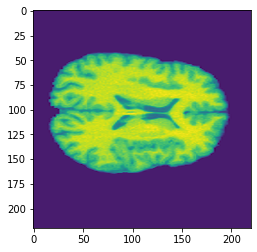

In [11]:
plt.imshow(imgs[0][..., 125])
plt.show()